<a href="https://colab.research.google.com/github/Moogun/img_processing/blob/master/lstm_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

from sklearn.metrics import accuracy_score
from keras.datasets import reuters
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

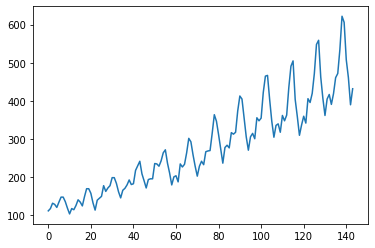

In [3]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('passenger.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()


In [4]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [5]:
numpy.random.seed(7)

In [6]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [7]:
dataframe = pandas.read_csv('passenger.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [36]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import SimpleRNN

In [3]:
n_units = 10
t_steps = 5
inpt_ftrs=2
model = Sequential()
model.add(SimpleRNN(n_units, input_shape=(t_steps, inpt_ftrs)))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 10)                130       
                                                                 
Total params: 130
Trainable params: 130
Non-trainable params: 0
_________________________________________________________________


In [7]:
vocab_size = 30
embddng_dim = 20
seqnc_lngth = 10

model2 = Sequential()
model2.add(Embedding(vocab_size, embddng_dim, input_length=seqnc_lngth))
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 10, 20)            600       
                                                                 
Total params: 600
Trainable params: 600
Non-trainable params: 0
_________________________________________________________________


In [38]:
from keras.datasets import imdb
from keras.preprocessing import sequence

inpt_dim = 128
index_from = 3

In [39]:
(x_train, y_train),(x_test, y_test)=imdb.load_data(num_words=10000,
                                                   start_char=1,
                                                   oov_char=2,
                                                   index_from=index_from,
                                                   skip_top=20)

In [40]:
x_train.shape

(25000,)

In [46]:
len(x_test[2])

128

In [43]:
x_train = sequence.pad_sequences(x_train, 
                                 maxlen=inpt_dim).astype('float32')
x_test = sequence.pad_sequences(x_test, maxlen=inpt_dim).astype('float32')

In [48]:
wrd2id = imdb.get_word_index()
wrd2id = {k:(v+index_from) for k,v in wrd2id.items()}
wrd2id["<PAD>"] = 0
wrd2id["<START>"] = 1
wrd2id["<UNK>"] = 2
wrd2id["<UNUSED>"] = 3

id2wrd = {value:key for key,value in wrd2id.items()}
print(' '.join(id2wrd[id] for id in x_train[2] ))

when my friends <UNK> were watching <UNK> film being <UNK> target audience <UNK> <UNK> aimed at we just sat watched <UNK> first half an hour <UNK> our jaws touching <UNK> floor at how bad <UNK> really <UNK> <UNK> rest <UNK> <UNK> time everyone else <UNK> <UNK> theatre just started talking <UNK> each other leaving or generally crying into their popcorn <UNK> they actually paid money they had <UNK> working <UNK> watch <UNK> feeble excuse <UNK> <UNK> film <UNK> must have looked like <UNK> great idea on paper but on film <UNK> looks like no one <UNK> <UNK> film has <UNK> clue what <UNK> going on crap acting crap costumes <UNK> can't get across how <UNK> <UNK> <UNK> <UNK> watch save yourself an hour <UNK> bit <UNK> your life


In [49]:
x_train.shape

(25000, 128)

In [20]:
x_train

array([[2.000e+00, 2.000e+00, 3.160e+02, ..., 2.000e+00, 1.780e+02,
        3.200e+01],
       [1.180e+02, 2.000e+00, 2.000e+00, ..., 2.000e+00, 1.450e+02,
        9.500e+01],
       [5.400e+01, 6.100e+01, 3.690e+02, ..., 2.000e+00, 1.290e+02,
        1.130e+02],
       ...,
       [2.070e+02, 1.100e+02, 5.630e+02, ..., 2.000e+00, 3.586e+03,
        2.000e+00],
       [4.500e+01, 5.800e+01, 1.466e+03, ..., 2.000e+00, 2.000e+00,
        2.300e+01],
       [4.050e+02, 3.900e+01, 2.000e+00, ..., 2.040e+02, 1.310e+02,
        2.000e+00]], dtype=float32)

In [50]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import SimpleRNN, Embedding, BatchNormalization
from tensorflow.keras.layers import Dense, Activation, Input, Dropout

In [77]:
seqnc_lngth = 128
embddng_dim = 64
vocab_size = 10000

In [78]:
input_vec = Input(shape=(seqnc_lngth))

In [79]:
l1 = Embedding(vocab_size, embddng_dim, input_length=seqnc_lngth)(input_vec)
l2 = Dropout(0.3)(l1)
l3 = SimpleRNN(32)(l2)
l4 = BatchNormalization()(l3)
l5 = Dropout(0.2)(l4)
output = Dense(1, activation='sigmoid')(l5)

rnn = Model(input_vec, output)

In [80]:
rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
rnn.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128)]             0         
                                                                 
 embedding_11 (Embedding)    (None, 128, 64)           640000    
                                                                 
 dropout_14 (Dropout)        (None, 128, 64)           0         
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, 32)                3104      
                                                                 
 batch_normalization_7 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dropout_15 (Dropout)        (None, 32)                0         
                                                           

In [81]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt

Epoch 1/1000
250/250 [==============================] - 19s 70ms/step - loss: 0.5656 - accuracy: 0.6941 - val_loss: 0.4150 - val_accuracy: 0.8316 - lr: 0.0010
Epoch 2/1000
250/250 [==============================] - 17s 70ms/step - loss: 0.3324 - accuracy: 0.8633 - val_loss: 0.3514 - val_accuracy: 0.8472 - lr: 0.0010
Epoch 3/1000
250/250 [==============================] - 18s 73ms/step - loss: 0.2360 - accuracy: 0.9069 - val_loss: 0.3997 - val_accuracy: 0.8456 - lr: 0.0010
Epoch 4/1000
250/250 [==============================] - 18s 72ms/step - loss: 0.1509 - accuracy: 0.9447 - val_loss: 0.4406 - val_accuracy: 0.8388 - lr: 0.0010
Epoch 5/1000
250/250 [==============================] - ETA: 0s - loss: 0.1042 - accuracy: 0.9628
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
250/250 [==============================] - 18s 70ms/step - loss: 0.1042 - accuracy: 0.9628 - val_loss: 0.5474 - val_accuracy: 0.8430 - lr: 0.0010
Epoch 6/1000
250/250 [======================

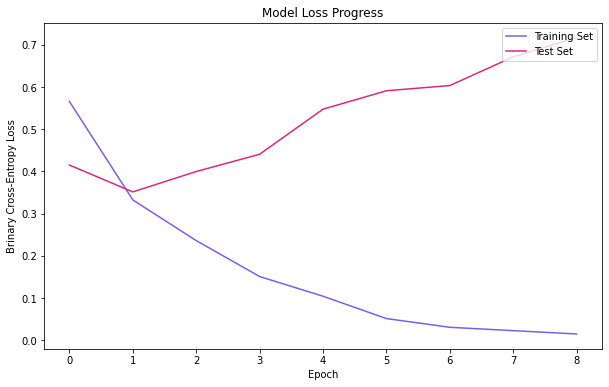

In [82]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_delta=1e-4, mode='min', verbose=1)
stop_alg = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
hist = rnn.fit(x_train, y_train, batch_size=100, epochs=1000, callbacks=[stop_alg, reduce_lr], shuffle=True, validation_data=(x_test, y_test))

rnn.save_weights("rnn.hdf5")

fig = plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], color='#785ef0')
plt.plot(hist.history['val_loss'], color='#dc267f')
plt.title('Model Loss Progress')
plt.ylabel('Brinary Cross-Entropy Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Test Set'], loc='upper right')
plt.show()

In [110]:
import pandas as pd
dt_train = pd.read_csv('stock_train.csv')
dt_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [111]:
dt_train.shape

(1258, 6)

In [112]:
tr_set = dt_train.iloc[:, 1:2].values
tr_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [113]:
from sklearn.preprocessing import MinMaxScaler  
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(tr_set)

In [114]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [115]:
training_set_scaled.shape

(1258, 1)

In [126]:
import numpy as np
from keras.layers import LSTM

In [116]:
X_train = []
y_train = [] 

for i in range(60, 1258):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [129]:
X_train.shape[0]

1198

In [119]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [120]:
X_train.shape

(1198, 60, 1)

In [134]:
reg = Sequential()
reg.add(LSTM(units=50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
reg.add(Dropout(0.2))

reg.add(LSTM(units=50, return_sequences = True))
reg.add(Dropout(0.2))

reg.add(LSTM(units=50, return_sequences = True))
reg.add(Dropout(0.2))

reg.add(LSTM(units=50))
reg.add(Dropout(0.2))

reg.add(Dense(units =1))
reg.compile(optimizer = 'adam', loss='mean_squared_error')

reg.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_16 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_17 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_4 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_18 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 50)              

In [137]:
X_train.shape[0]

1198